# #DuBoisChallenge2024 Challenge 05

Alright, it's time for a Du Bois bar chart again. We can complete it in three steps:

1. Load the data
2. Test visualisation
3. Final visualisation

But first, we load the required packages:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

# 1. Load the data

Let's load the data for challenge 04 and review the results:

In [4]:
df = pd.read_csv('2024/challenge05/data.csv')
df.head(5)

,Category,Percentage
0,Black,44
1,Brown,40
2,Yellow,16


Alright, that is a manageable dataset. 

# 2. Test visualisation

First, we'll try to visualise the data using a standard matplotlib plot.

<IPython.core.display.Javascript object>


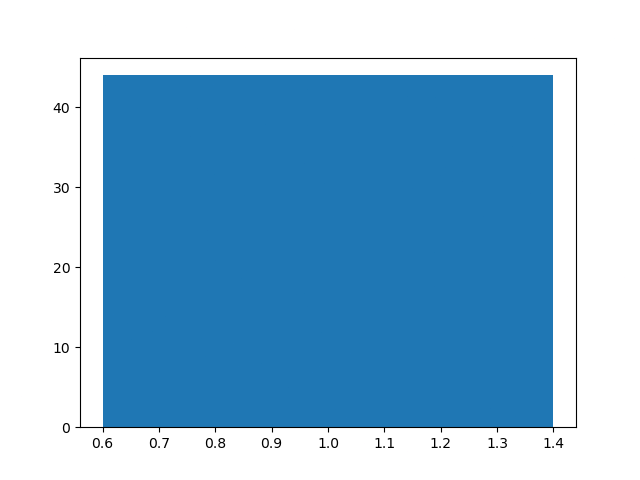

<BarContainer object of 3 artists>

In [5]:
fig, ax = plt.subplots()
ax.bar(1, df['Percentage'])

Alright, that doesn't cut it. We can convert this into a stacked bar chart using the bottom parameter.

<IPython.core.display.Javascript object>


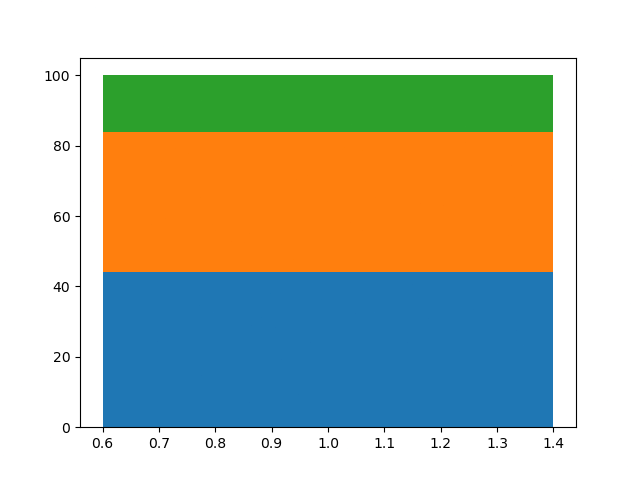

In [6]:
fig, ax = plt.subplots()

bottom_value = 0

for index, row, in df.iterrows():
    row_perc = row['Percentage']
    ax.bar(1, row_perc, bottom=bottom_value)
    bottom_value += row_perc

That is almost correct. The Du Bois visual has the smalles value at the bottom. Let's reverse the data to take that into account.

<IPython.core.display.Javascript object>


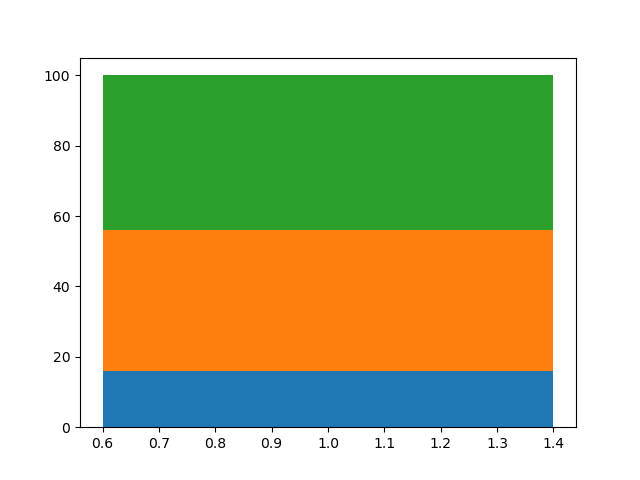

In [7]:
df = df.sort_index(ascending=False).reset_index()

fig, ax = plt.subplots()

bottom_value = 0

for index, row, in df.iterrows():
    row_perc = row['Percentage']
    ax.bar(1, row_perc, bottom=bottom_value)
    bottom_value += row_perc

Alright, we're technically done again. (That was a lot easier for me than last week's geospatial projection.)

Let's add Du Bois's sense of design to it :)

## 3. Final visualisation

To convert that very standard stacked bar chart to a Du Bois one, we need to do a few things:

- Add Du Bois's colours
- Add various text labels
    - Title + subtitle
    - Axis labels + sub labels
    - Data labels in bars
- Remove axes
- Change plost spacing

Let's see how that looks :)

In this first version, I remove all the redundant elements and apply the correct colors. Note, that in the original design, the bars have a thing black outline.

<IPython.core.display.Javascript object>


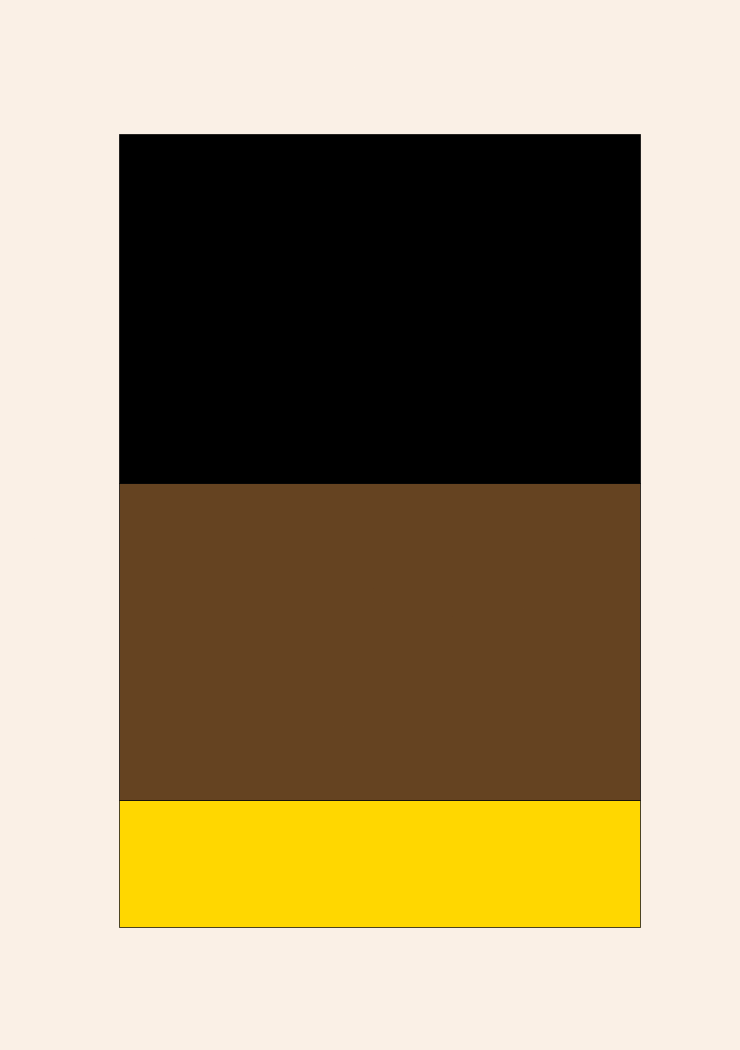

(0.5599999999999999, 1.44, -1.0, 101.0)

In [8]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

bottom_value = 0

colors = [
    dubois_colors['gold'],
    dubois_colors['brown'],
    dubois_colors['black'],
]

for index, row, in df.iterrows():
    row_perc = row['Percentage']
    ax.bar(
        1, 
        row_perc, 
        bottom=bottom_value,
        color=colors[index],
        edgecolor=dubois_colors['black'],
        lw=.5,
    )
    bottom_value += row_perc
    
# bay adding an outline, the axis limit needs to be adjuste slightly
# try commenting the line below to see how the top and bottom line fall of the chart
ax.set_ylim(-1, 101)

ax.axis('off')

Alright, lets add some data labels now.

<IPython.core.display.Javascript object>


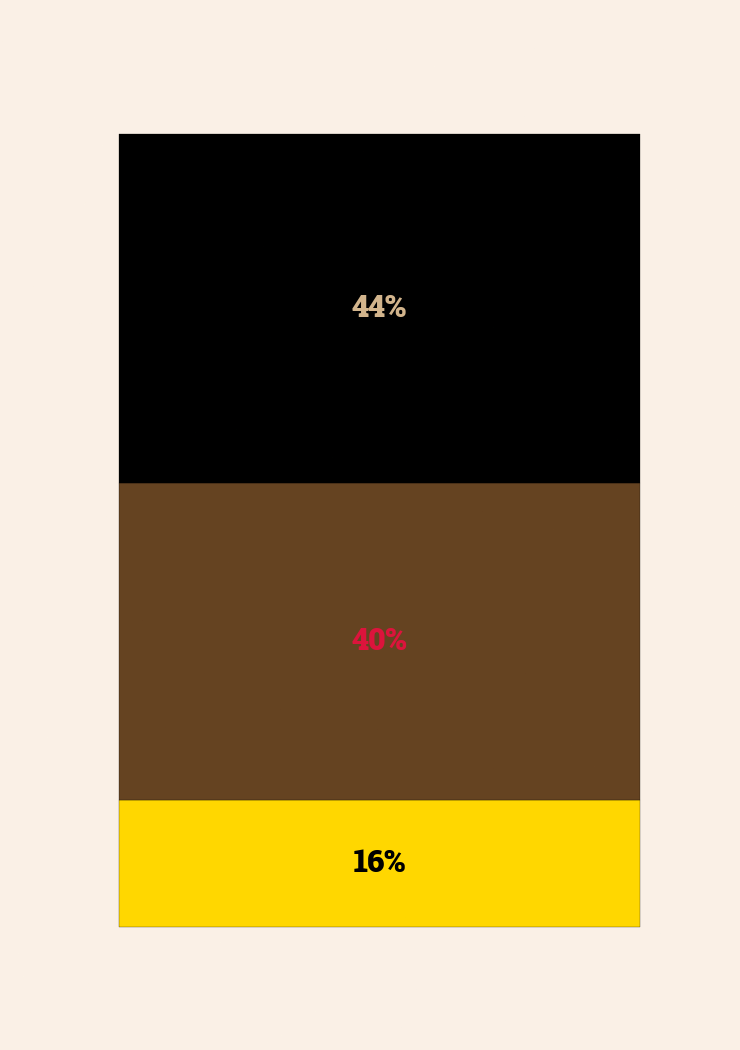

(0.5599999999999999, 1.44, -1.0, 101.0)

In [9]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

# load fonts
rob_font_heavy = {'fontname':'Roboto Slab', 'fontweight': 'black'}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light'}

bottom_value = 0

colors = [
    dubois_colors['gold'],
    dubois_colors['brown'],
    dubois_colors['black'],
]

# add annotation colours
data_label_colors = [
    dubois_colors['black'],
    dubois_colors['crimson'],
    dubois_colors['tan']
]

for index, row, in df.iterrows():
    row_perc = row['Percentage']
    ax.bar(
        1, 
        row_perc, 
        bottom=bottom_value,
        color=colors[index],
        edgecolor=dubois_colors['black'],
        lw=.2,
    )
    
    # add data annotations
    ax.annotate(
        f'{str(row_perc)}%',
        (1, bottom_value + (row_perc/2)),
        color=data_label_colors[index],
        fontsize=22,
        ha='center',
        va='center',
        **rob_font_heavy
    )
    bottom_value += row_perc
    
ax.set_ylim(-1, 101)

ax.axis('off')

Alright, next up, we gave the plot some space, so it matches the original a bit more.

<IPython.core.display.Javascript object>


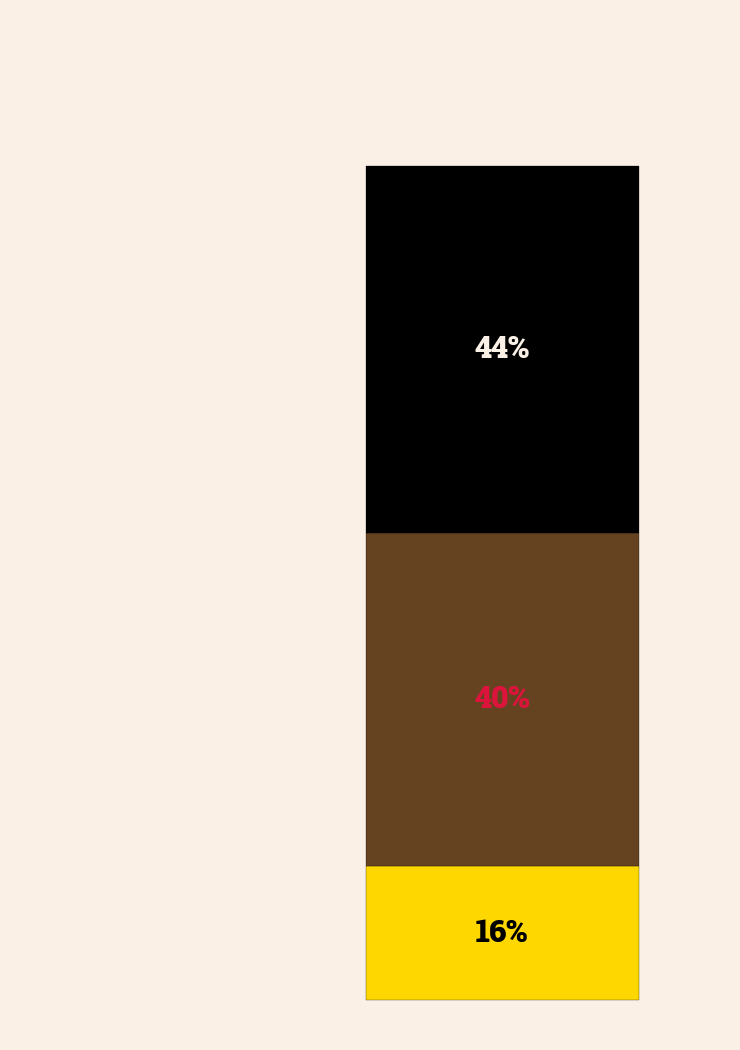

In [10]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

rob_font_heavy = {'fontname':'Roboto Slab', 'fontweight': 'black'}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light'}

bottom_value = 0

colors = [
    dubois_colors['gold'],
    dubois_colors['brown'],
    dubois_colors['black'],
]

data_label_colors = [
    dubois_colors['black'],
    dubois_colors['crimson'],
    dubois_colors['bg']
]

for index, row, in df.iterrows():
    row_perc = row['Percentage']
    ax.bar(
        1, 
        row_perc, 
        bottom=bottom_value,
        color=colors[index],
        width=1,
        edgecolor=dubois_colors['black'],
        lw=.2,
    )
    ax.annotate(
        f'{str(row_perc)}%',
        (1, bottom_value + (row_perc/2)),
        color=data_label_colors[index],
        fontsize=22,
        ha='center',
        va='center',
        **rob_font_heavy
    )
    bottom_value += row_perc
    
ax.set_ylim(-1, 101)

# move plot to the right by playing with xlim
# also creates space for axis labels later
ax.set_xlim(-.5, 1.6)

ax.axis('off')

# add the right margins to the top and bottom of the figure
plt.subplots_adjust(top=0.85, bottom=.04)

Alright, all we have left to do now is add the plot title and axis labels. As I rather liked using `plt.text` last week, I'll use that.

<IPython.core.display.Javascript object>


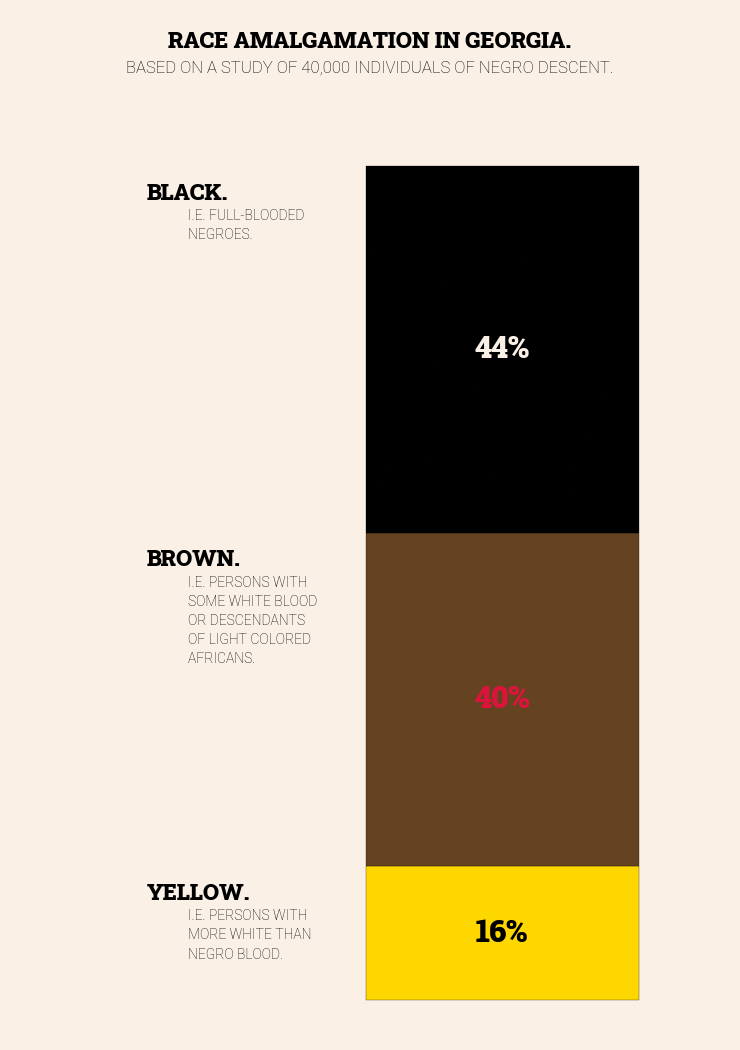

In [12]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

rob_font_heavy = {'fontname':'Roboto Slab', 'fontweight': 'black'}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light'}

bottom_value = 0

colors = [
    dubois_colors['gold'],
    dubois_colors['brown'],
    dubois_colors['black'],
]

data_label_colors = [
    dubois_colors['black'],
    dubois_colors['crimson'],
    dubois_colors['bg']
]

# make axis label list
axis_labels = [
    {
        'main': 'YELLOW.',
        'sub': '''
        I.E. PERSONS WITH\n
        MORE WHITE THAN\n
        NEGRO BLOOD.
        ''',
    },
    {
        'main': 'BROWN.',
        'sub': '''
        I.E. PERSONS WITH\n
        SOME WHITE BLOOD\n
        OR DESCENDANTS\n
        OF LIGHT COLORED\n
        AFRICANS.
        ''',
    },
    {
        'main': 'BLACK.',
        'sub': '''
        I.E. FULL-BLOODED\n
        NEGROES.
        ''',
    },
]

sum_perc = sum(df['Percentage'])

for index, row, in df.iterrows():
    row_perc = row['Percentage']
    ax.bar(
        1, 
        row_perc, 
        bottom=bottom_value,
        color=colors[index],
        width=1,
        edgecolor=dubois_colors['black'],
        lw=.2,
    )
    ax.annotate(
        f'{str(row_perc)}%',
        (1, bottom_value + (row_perc/2)),
        color=data_label_colors[index],
        fontsize=22,
        ha='center',
        va='center',
        **rob_font_heavy
    )
    
    # add axis text
    plt.text(
        x=-0.3,
        y=row_perc+bottom_value-(2/100*sum_perc),
        s=axis_labels[index]['main'],
        va='top',
        ha='left',
        fontsize=16,
        **rob_font_heavy
    )
    
    # add axis sub text
    plt.text(
        x=-0.25,
        y=row_perc+bottom_value-(4/100*sum_perc),
        s=f"{axis_labels[index]['sub']}",
        va='top',
        ha='left',
        fontsize=10,
        linespacing=.6,
        **rob_font_light
    )
    bottom_value += row_perc
    
ax.set_ylim(-1, 101)
ax.set_xlim(-.5, 1.6)
ax.axis('off')

plt.subplots_adjust(top=0.85, bottom=.04)

# add plot title 
plt.text(
    x=.5,
    y=.96,
    s='RACE AMALGAMATION IN GEORGIA.',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=16,
    **rob_font_heavy
)

# add plot subtitle
plt.text(
    x=.5,
    y=.935,
    s='BASED ON A STUDY OF 40,000 INDIVIDUALS OF NEGRO DESCENT.',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=12,
    **rob_font_light
)

plt.savefig('challenge05.png', dpi=300)

That's it.